# SVD(Singular Value Decomposition)
**SVD의 개요**  
- SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용이 가능
    - PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있음
- SVD는 $ \ m \times \ n$크기의 행렬 $A$를 다음과 같이 분해하는 것을 의미함
$$A=U\sum V^T$$
- SVD는 특이값 분해라고 불리며, 행렬 $U$와 $V$에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이벡터는 서로 직교하는 성질을 가짐
- $\sum$는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0
- $\sum$이 위치한 0이 아닌 값이 바로 행렬 $A$의 특이값
![image](https://user-images.githubusercontent.com/70187490/132281618-e784c5a2-4fba-44e3-8d7f-220255fe0624.png)


- 하지만 일반적으로 $\sum$의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 $\sum$에 대응되는 $U$와 $V$ 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적요함
- 컴팩트한 형태로 SVD를 적용하면 $A$의 차원이 $m \times n$일 때, $U$차원을 $m \times p$, $ \sum$의 차원을 $p \times p$, $V^T$의 차원을 $p \times n$으로 분해함
![image](https://user-images.githubusercontent.com/70187490/132281853-c70056eb-f7f6-47ac-b7bd-04d08639e6b8.png)

## 넘파이를 이용하여 SVD 연산 수행
- 일반적인 SVD는 넘파이나 사이파이 라이브러리를 이용해 수행함
- 넘파이의 SVD 모듈인 numpy.linalg.svd를 로딩함
- 랜덤한 $4 \times 4$ 넘파이 행렬을 생성함
- 랜덤 행렬을 생헝하는 이뉴는 행렬의 개별 로우끼리의 의존성을 없애기 위함

In [3]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
np.round(a, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

- 이렇게 생성된 a행렬에 SVD를 적용해 U, Sigma, Vt를 도출
- SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U행렬, Sigma 행렬, V 전치 행렬을 반환
- Sigma 행렬을 경우, $A=U \sum V^T$에서 $\sum$행렬을 나타내며, $\sum$행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고 그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현

In [4]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix: \n', np.round(U,3))
print('Sigma Value: \n', np.round(Sigma,3))
print('V transpose matrix: \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix: 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value: 
 [3.423 2.023 0.463 0.079]
V transpose matrix: 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- U행렬이 $4 \times 4$, Vt 행렬이 $4 \times 4$로 반환됐고, Sigma의 경우는 1차원 행렬인 (4,)로 반환
- 분해된 이 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인
- 원본 행렬로의 복원은 이 S, Sigma, Vt를 내적하면 가능
- 한가지 유의할 것은 Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 함

In [8]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
Sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [10]:
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print('변환된 a_행렬: \n', np.round(a_, 3))
print()
print('변환되기 전 a행렬: \n', np.round(a, 3))

변환된 a_행렬: 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]

변환되기 전 a행렬: 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- U, Sigma, Vt를 이용해 원본행렬 a와 동일하게 복원되었음
- 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지를 알아보자
- 일부러 의존성을 부여하기 위해 a행렬의 3번째 로우를 '첫 번째 로우 + 두번째 로우'로 업데이트하고 4번째 로우는 첫 번째 로우와 같게 설정

In [11]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [12]:
# 로우간 관계를 매우 높인 데이터를 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value: \n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value: 
 [2.663 0.807 0.    0.   ]


- 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변했음
- 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미(즉, 행렬의 랭크(Rank)가 2)
- U, Sigma, Vt를 이용해 원본 행렬로 복원
    - 이번에는 전체 데이터를 사용하지 않고 Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원
    - 즉, Sigma의 경우 앞의 2개 요소만 0이 아니므로 U행렬중 선형 두개의 열만 추출하고, Vt의 경우 선행 두 개의 행만 추출해 복원

In [16]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print('2개의 특이값만 추출했던 a_행렬: \n', np.round(a_, 3))
print()
print('추출 전 a행렬: \n', np.round(a, 3))

(4, 2) (2, 2) (2, 4)
2개의 특이값만 추출했던 a_행렬: 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]

추출 전 a행렬: 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


## Truncated SVD
- Truncated SVD는 $\sum$행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
- 이렇게 분해하면 인위적으로 더 작은 차원의 $U, \sum, V^T$로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할수 없다.
- 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있다.
- 원래 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원 가능
> Truncated SVD를 실습  

- Trucated SVD는 넘파이가 아닌 사이파이에서만 지원
- 사이파이의 SVD는 scipy.linalg.svd를 이용하면 되지만 Truncated SVD는 희소행렬로만 지원돼서 scipy.sparse.linalg.svds를 이용해야 함
- 임의의 원본행렬 $6 \times 6$을 Normal SVD로 분해해 분해된 행렬의 차원과 Sigma 행렬 내의 특이값을 확인한 뒤 
- 다시 Trucated SVD로 분해해 분해된 차원의 행렬의 차원, Sigma 행렬내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본데이터를 비교

In [17]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

# 사이킷런 Truncated SVD 클래스를 이용한 변환

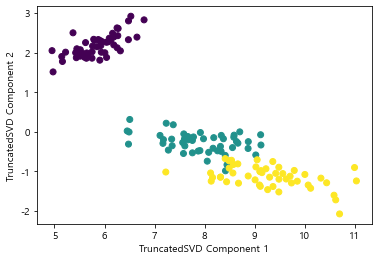

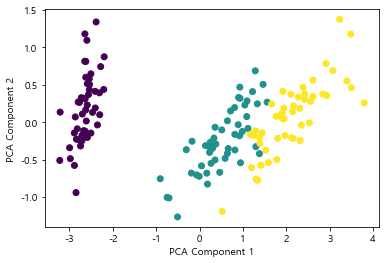

In [39]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD변환
tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(iris_ftrs)

pca = PCA()
iris_pca = pca.fit_transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.figure()
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2');

plt.figure()
plt.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2');

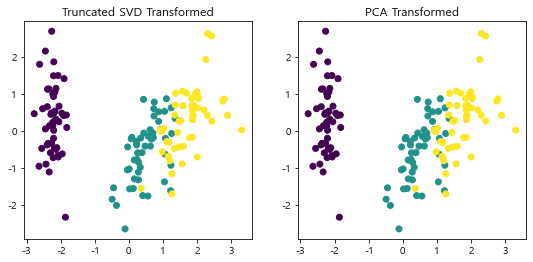

In [40]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scale = scaler.fit_transform(iris_ftrs)

# 스케일된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(iris_scale)

# 스케일된 데이터 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scale)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed');

In [41]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.302035876737089e-15
-2.7755575615628914e-17


- 두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 서로 비교해보면 거의 같음을 알수 있음
- 차이가 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다.
- 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행함
- 이는 PCA가 SVD 알고리즘으로 구현이 되었으나 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능